In [11]:
from dateutil.parser import parse
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams.update({'figure.figsize':(10,7),'figure.dpi':120})

In [5]:
data = pd.read_csv("store-sales-time-series-forecasting\\train.csv")

In [6]:
data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [7]:
data.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [9]:
numeric_cols = data.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['id', 'store_nbr', 'sales', 'onpromotion'], dtype='object')
Index(['date', 'family'], dtype='object')


In [12]:
data['family'].value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

In [10]:
data[non_numeric_cols].describe()

,date,family
count,3000888,3000888
unique,1684,33
top,2013-01-01,AUTOMOTIVE
freq,1782,90936


In [13]:
print('Starting date:',data['date'].min())
print('Ending date:',data['date'].max())

Starting date: 2013-01-01
Ending date: 2017-08-15


In [14]:
### Check out missing values:
data.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [15]:
data= data.groupby('date')['sales'].sum().reset_index()
data.head()

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229


In [16]:
data['date'] = pd.to_datetime(data['date'])
data= data.set_index('date')
data

,sales
date,
2013-01-01,2511.618999
2013-01-02,496092.417944
2013-01-03,361461.231124
2013-01-04,354459.677093
2013-01-05,477350.121229
...,...
2017-08-11,826373.722022
2017-08-12,792630.535079
2017-08-13,865639.677471


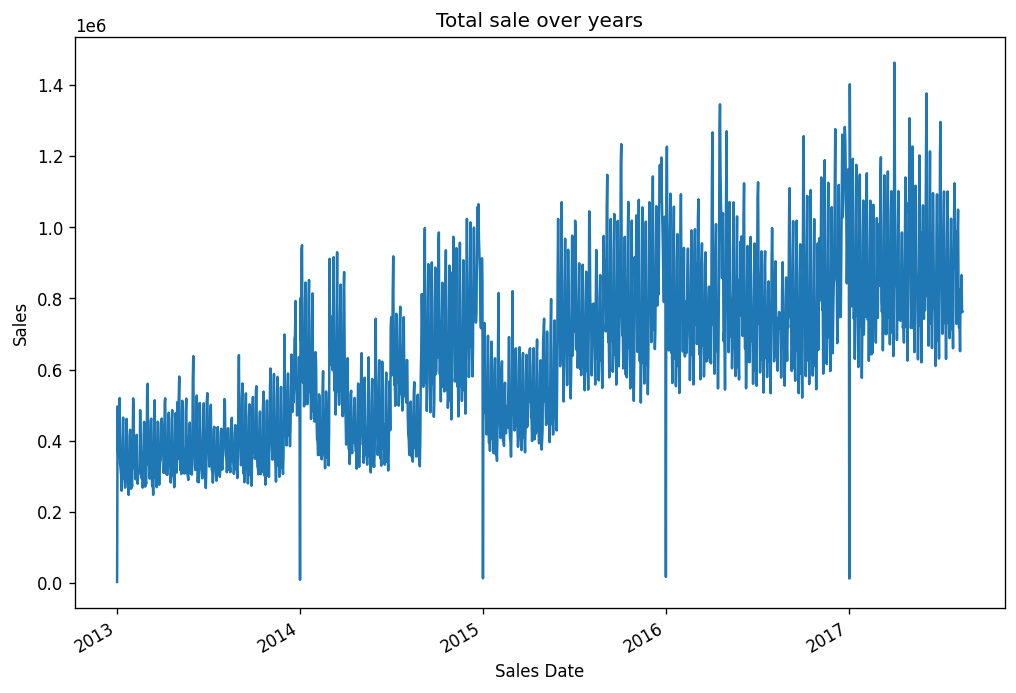

In [17]:
data['sales'].plot()
plt.xlabel('Sales Date')
plt.ylabel('Sales')
plt.title('Total sale over years')
plt.show()

In [20]:
#create new DataFrame
monthly_Sales = pd.DataFrame()

monthly_Sales['sales'] = data['sales'].resample('MS').mean()

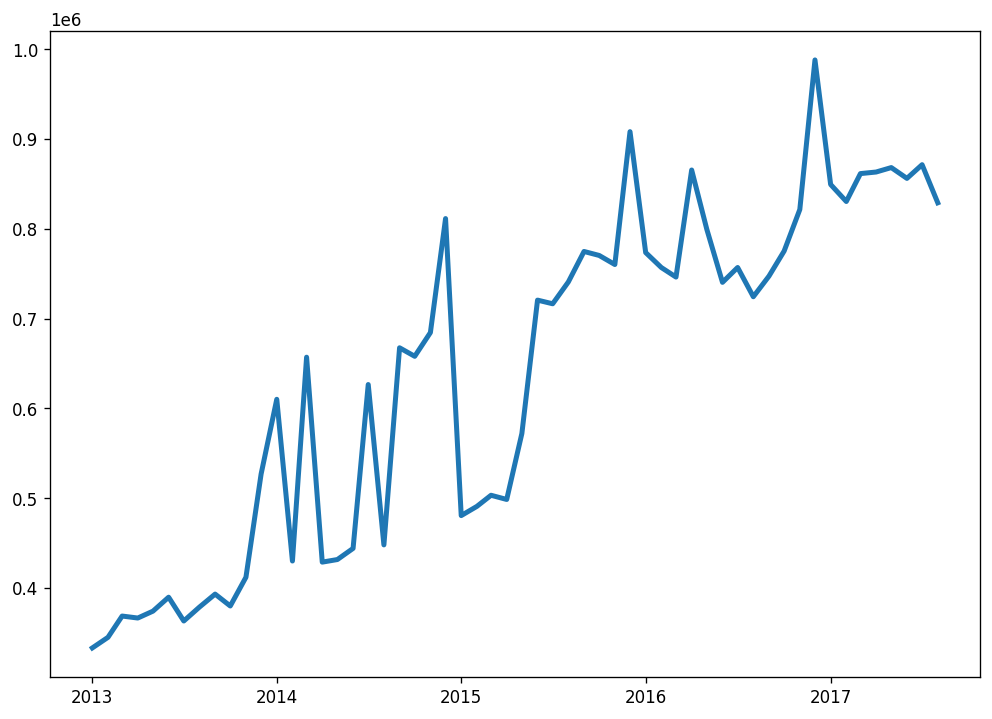

In [21]:
#plot weekly sales data
plt.plot(monthly_Sales.index, monthly_Sales.sales, linewidth=3)

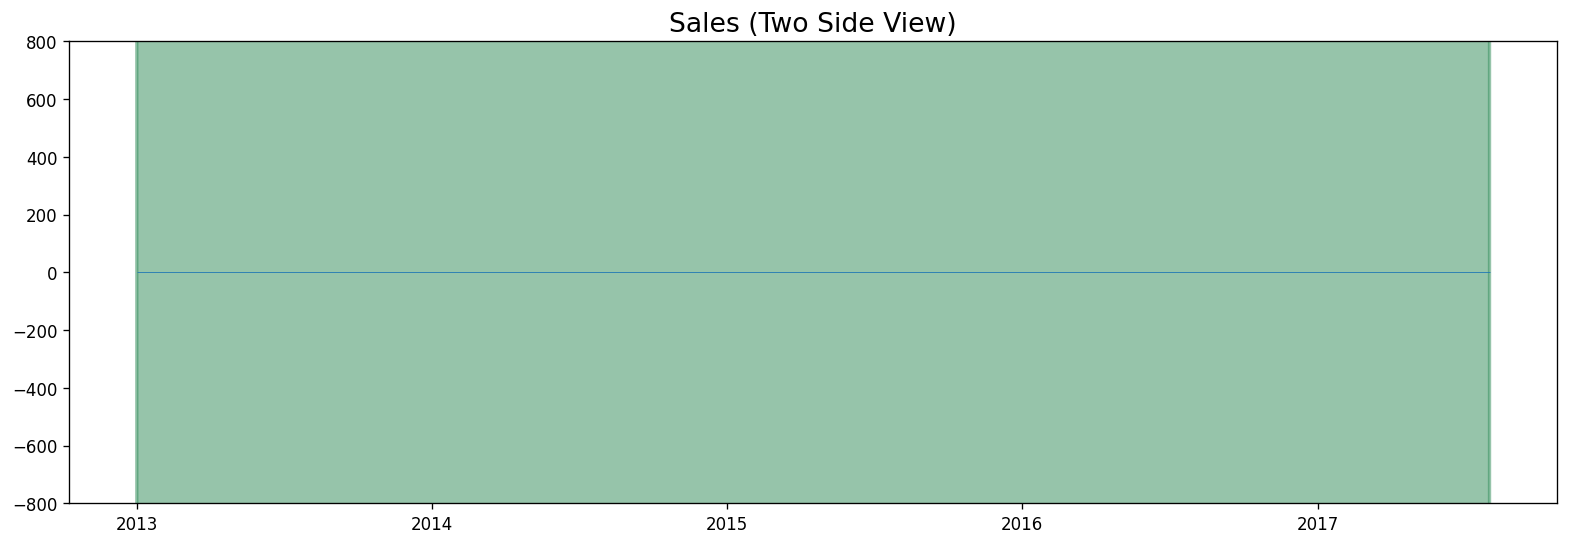

In [22]:
x= monthly_Sales.index
y1= monthly_Sales['sales'].values

fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Sales (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(monthly_Sales.index), xmax=np.max(monthly_Sales.index), linewidth=.5)
plt.show()

In [23]:
monthly_Sales['year'] = [d.year for d in monthly_Sales.index]
monthly_Sales['month'] = [d.strftime('%b') for d in monthly_Sales.index]
years= monthly_Sales['year'].unique()
years

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

ValueError: Could not interpret value `Sales` for `y`. An entry with this name does not appear in `data`.

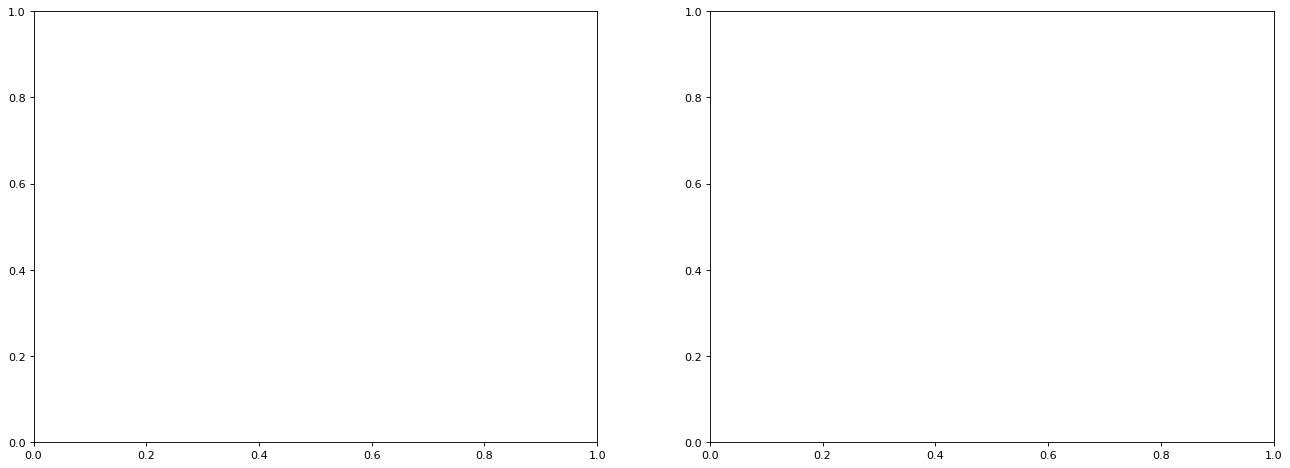

In [24]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Sales', data=monthly_Sales, ax=axes[0])
sns.boxplot(x='month', y='Sales', data=monthly_Sales.loc[~monthly_Sales.year.isin([2013,2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

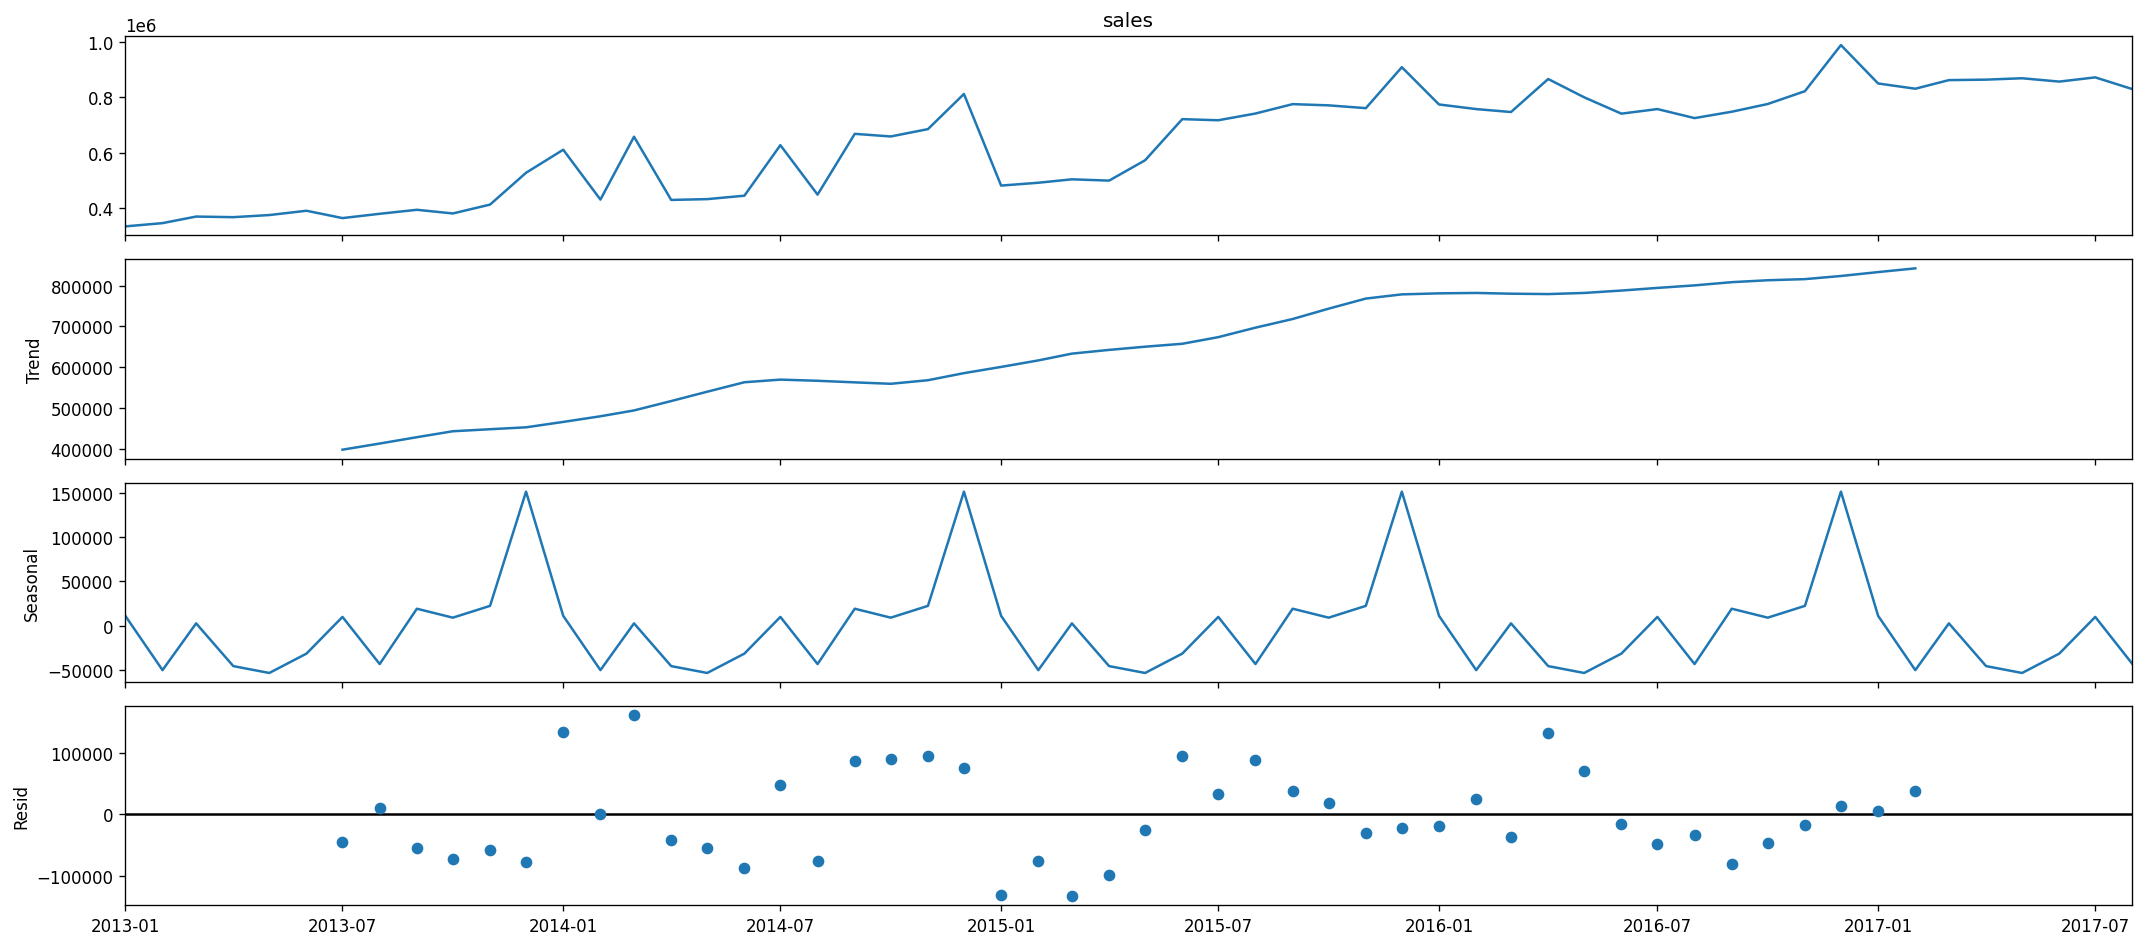

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_Sales['sales'], model='additive')
fig = decomposition.plot()
plt.show()

In [26]:
#Determing rolling statistics
moving_avg = monthly_Sales.rolling(12).mean()
moving_std= monthly_Sales.rolling(12).std()

C:\Users\de\AppData\Local\Temp\ipykernel_7640\651801222.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['month'], dtype='object')
  moving_avg = monthly_Sales.rolling(12).mean()
C:\Users\de\AppData\Local\Temp\ipykernel_7640\651801222.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['month'], dtype='object')
  moving_std= monthly_Sales.rolling(12).std()


ConversionError: Failed to convert value(s) to axis units: array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug'], dtype=object)

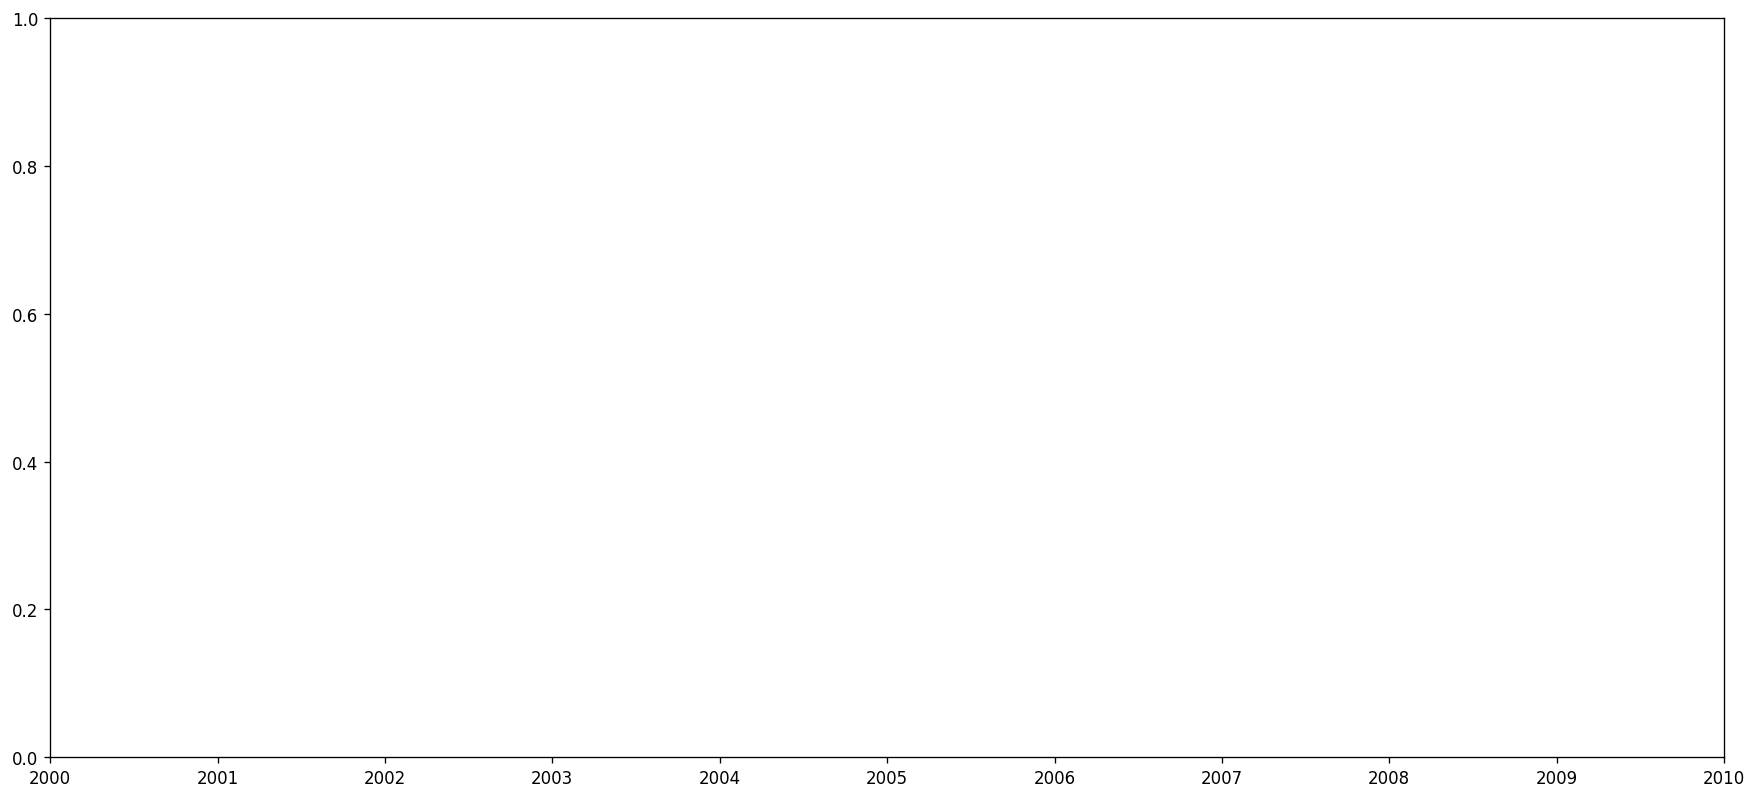

In [27]:
#Plot rolling statistics:
orig = plt.plot(monthly_Sales, color='blue',label='Original')
mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
std = plt.plot(moving_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [28]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(monthly_Sales, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:


ValueError: could not convert string to float: 'Jan'